In [ ]:
## DOCUMENT SET UP

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# import cleaned data

In [2]:
diabetes = pd.read_csv("diabetes-after-full-clean-noindex.csv",dtype={'encounter_id': 'int64', 'patient_nbr': 'int64', 'race': 'category', 'gender': 'category', 'age': 'category', 'weight': 'category', 'admission_type_id': 'category', 'discharge_disposition_id': 'category', 'admission_source_id': 'category', 'time_in_hospital': 'int64', 'payer_code': 'category', 'medical_specialty': 'category', 'num_lab_procedures': 'int64', 'num_procedures': 'int64', 'num_medications': 'int64', 'number_outpatient': 'int64', 'number_emergency': 'int64', 'number_inpatient': 'int64', 'diag_1': 'category', 'diag_2': 'category', 'diag_3': 'category', 'number_diagnoses': 'int64', 'max_glu_serum': 'category', 'A1Cresult': 'category', 'metformin': 'category', 'repaglinide': 'category', 'nateglinide': 'category', 'chlorpropamide': 'category', 'glimepiride': 'category', 'acetohexamide': 'category', 'glipizide': 'category', 'glyburide': 'category', 'tolbutamide': 'category', 'pioglitazone': 'category', 'rosiglitazone': 'category', 'acarbose': 'category', 'miglitol': 'category', 'troglitazone': 'category', 'tolazamide': 'category', 'examide': 'category', 'citoglipton': 'category', 'insulin': 'category', 'glyburide-metformin': 'category', 'glipizide-metformin': 'category', 'glimepiride-pioglitazone': 'category', 'metformin-rosiglitazone': 'category', 'metformin-pioglitazone': 'category', 'change': 'category', 'diabetesMed': 'category', 'readmitted': 'category'}, usecols=range(1, 50))

## Re-checking data

In [3]:
# REMOVED ENOUNTER ID AS THIS IS JUST A UNIQUE ID THAT DOESN'T NEED TO BE EXPLORED

In [4]:
diabetes.shape

(101766, 49)

In [5]:
print (diabetes.dtypes)

patient_nbr                    int64
race                        category
gender                      category
age                         category
weight                      category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
time_in_hospital               int64
payer_code                  category
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int64
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
g

# PART 2 - DATA EXPLORATION 

### A - EXPLORE EACH COLUMN

#### USING APPROPRIATE DESCRIPTIVE STATISTICS

In [6]:
# MATHEMATICAL SUMMARY STATISCS FOR ALL NUMERICAL COLUMNS
# Maybe also exclude patient number as this isn't really a value?
diabetes.describe()

,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,5.433040e+07,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,3.869636e+07,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.350000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.341322e+07,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.550514e+07,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,8.754595e+07,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,1.895026e+08,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [7]:
# FREQUENCY COUNT FOR ALL NUMERICAL VALUES
for col in diabetes.columns:
    if (diabetes[col].dtype.name == 'int64'):
        print diabetes[col].value_counts(), '\n'

88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
23643405     22
84428613     22
92709351     21
23398488     20
90609804     20
88789707     20
37096866     20
89472402     20
29903877     20
88681950     19
88479036     19
97391007     19
24011577     18
3481272      18
91160280     18
84348792     18
3401055      18
91751121     18
106757478    17
90489195     17
41699412     17
84676248     16
384939       16
90164655     16
41617368     16
             ..
141459593     1
54207855      1
71579169      1
23406147      1
6348348       1
137952824     1
23234103      1
78943797      1
43683723      1
85241394      1
18267696      1
45161577      1
32417442      1
61105707      1
106231896     1
3397149       1
39734766      1
23850522      1
42977016      1
113160366     1
8105490       1
16600590      1
92990970      1
783198        1
105551478     1
71081460      1
30060018      1
67443444      1
141344240     1
93251151      1
Name: patient_nbr, Lengt

In [8]:
# PROPORTIONALITY FOR ALL NUMERICAL VALUES
for col in diabetes.columns:
    if (diabetes[col].dtype.name == 'int64'):
        print diabetes[col].value_counts(normalize=True), '\n'

88785891     0.000393
43140906     0.000275
23199021     0.000226
1660293      0.000226
88227540     0.000226
23643405     0.000216
84428613     0.000216
92709351     0.000206
23398488     0.000197
90609804     0.000197
88789707     0.000197
37096866     0.000197
89472402     0.000197
29903877     0.000197
88681950     0.000187
88479036     0.000187
97391007     0.000187
24011577     0.000177
3481272      0.000177
91160280     0.000177
84348792     0.000177
3401055      0.000177
91751121     0.000177
106757478    0.000167
90489195     0.000167
41699412     0.000167
84676248     0.000157
384939       0.000157
90164655     0.000157
41617368     0.000157
               ...   
141459593    0.000010
54207855     0.000010
71579169     0.000010
23406147     0.000010
6348348      0.000010
137952824    0.000010
23234103     0.000010
78943797     0.000010
43683723     0.000010
85241394     0.000010
18267696     0.000010
45161577     0.000010
32417442     0.000010
61105707     0.000010
106231896 

In [9]:
# FREQUENCY COUNT FOR ALL CATEGORICAL DATA
for col in diabetes.columns:
    if (diabetes[col].dtype.name == 'category'):
        print diabetes[col].value_counts(), '\n'

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64 

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64 

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64 

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64 

1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64 

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9  

In [10]:
# PROPORTIONALITY FOR ALL CATEGORICAL VALUES
for col in diabetes.columns:
    if (diabetes[col].dtype.name == 'category'):
        print diabetes[col].value_counts(normalize=True), '\n'

Caucasian          0.764868
AfricanAmerican    0.193079
Hispanic           0.020474
Other              0.015137
Asian              0.006443
Name: race, dtype: float64 

Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: gender, dtype: float64 

[70-80)     0.256156
[60-70)     0.220928
[50-60)     0.169565
[80-90)     0.168986
[40-50)     0.095169
[30-40)     0.037095
[90-100)    0.027445
[20-30)     0.016282
[10-20)     0.006790
[0-10)      0.001582
Name: age, dtype: float64 

[75-100)     0.417892
[50-75)      0.280576
[100-125)    0.195496
[125-150)    0.045355
[25-50)      0.030341
[0-25)       0.015014
[150-175)    0.010948
[175-200)    0.003441
>200         0.000938
Name: weight, dtype: float64 

1    0.530531
3    0.185416
2    0.181593
6    0.051992
5    0.047020
8    0.003144
7    0.000206
4    0.000098
Name: admission_type_id, dtype: float64 

1     0.591887
3     0.137118
6     0.126781
18    0.036269
2     0.020911
22    0.019584
11   

In [11]:
diabetes['patient_nbr'].value_counts()

88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
23643405     22
84428613     22
92709351     21
23398488     20
90609804     20
88789707     20
37096866     20
89472402     20
29903877     20
88681950     19
88479036     19
97391007     19
24011577     18
3481272      18
91160280     18
84348792     18
3401055      18
91751121     18
106757478    17
90489195     17
41699412     17
84676248     16
384939       16
90164655     16
41617368     16
             ..
141459593     1
54207855      1
71579169      1
23406147      1
6348348       1
137952824     1
23234103      1
78943797      1
43683723      1
85241394      1
18267696      1
45161577      1
32417442      1
61105707      1
106231896     1
3397149       1
39734766      1
23850522      1
42977016      1
113160366     1
8105490       1
16600590      1
92990970      1
783198        1
105551478     1
71081460      1
30060018      1
67443444      1
141344240     1
93251151      1
Name: patient_nbr, Lengt

/Users/ellenitoumpas/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


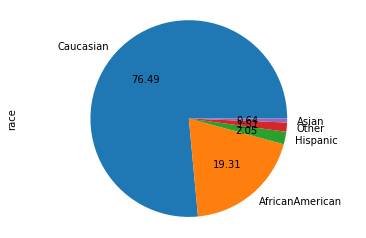

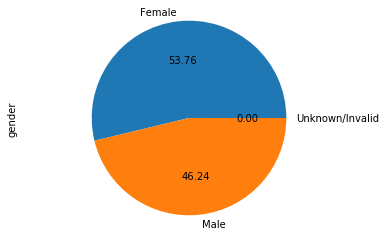

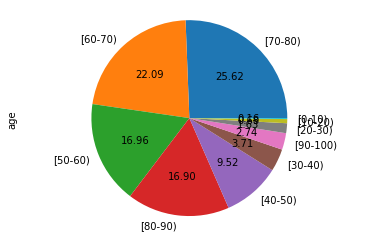

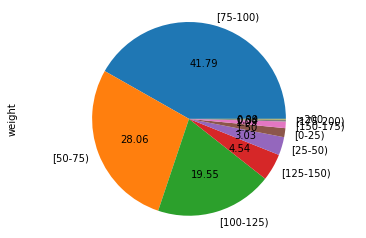

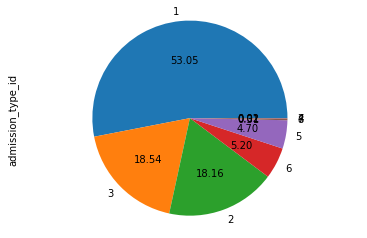

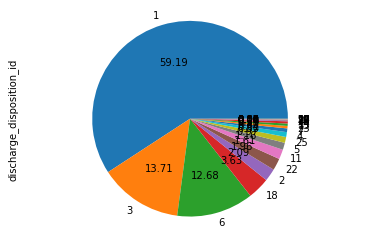

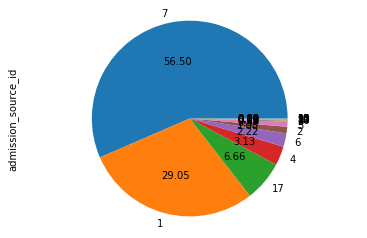

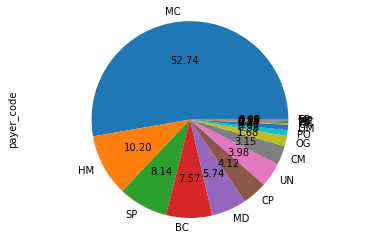

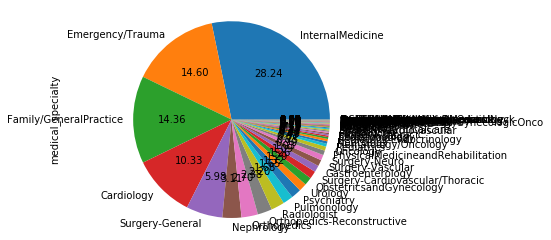

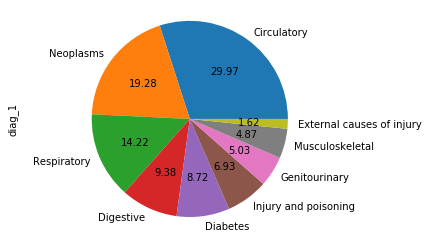

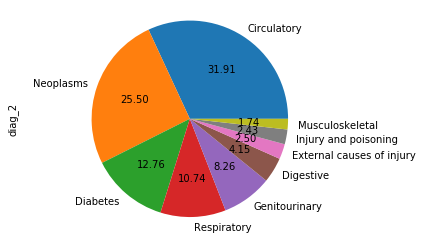

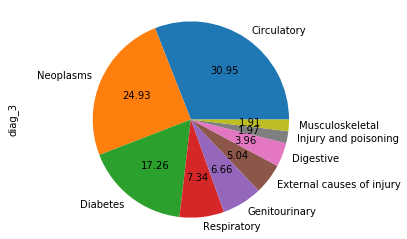

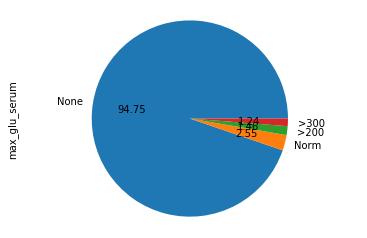

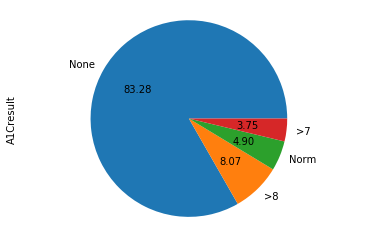

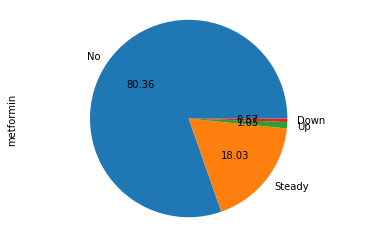

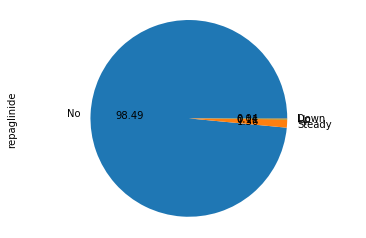

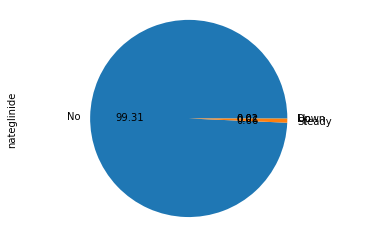

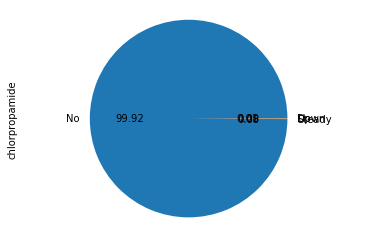

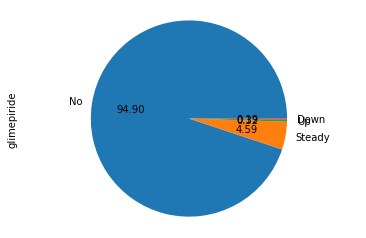

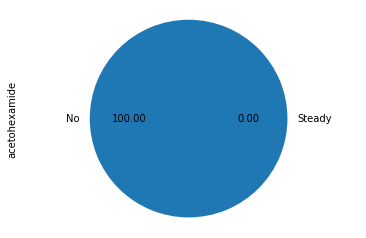

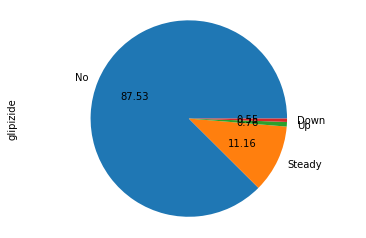

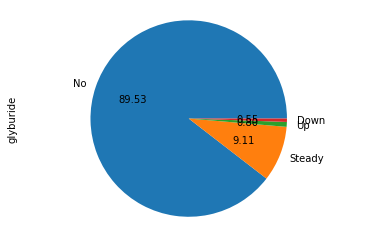

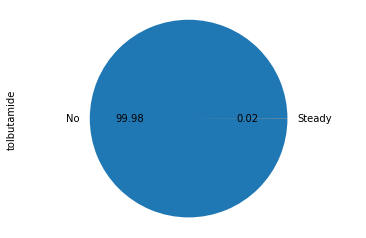

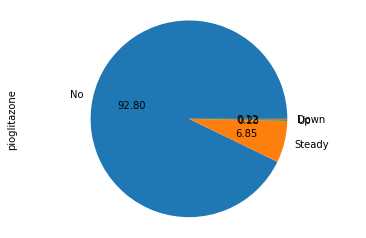

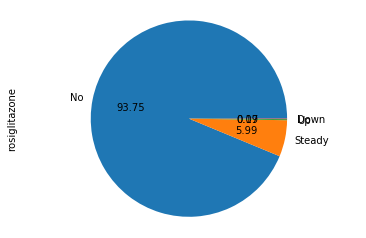

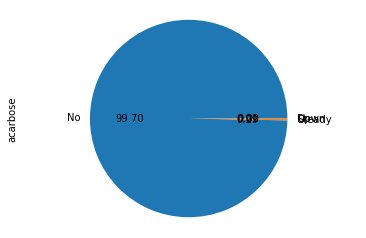

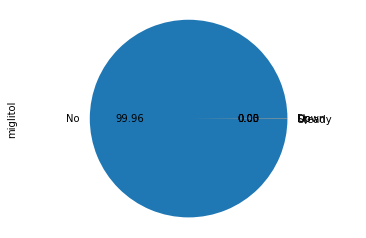

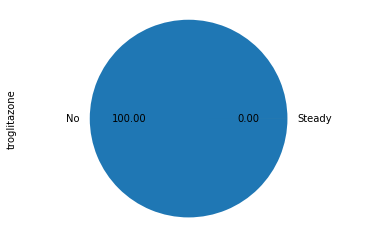

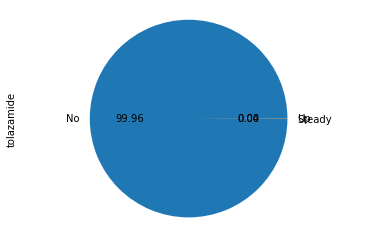

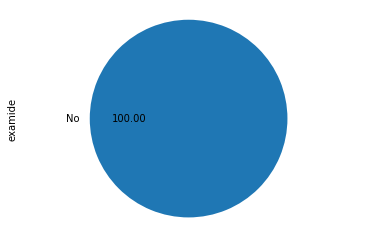

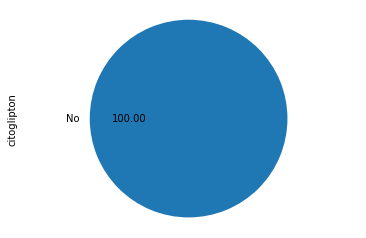

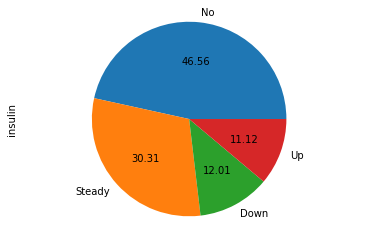

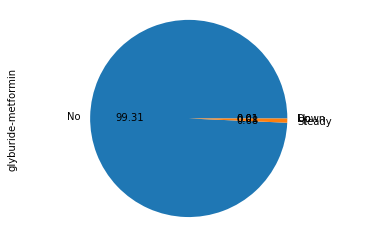

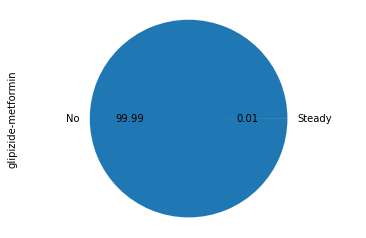

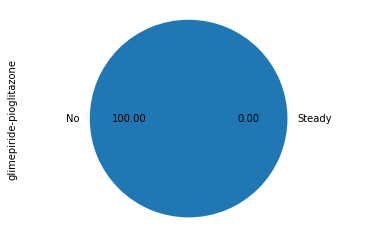

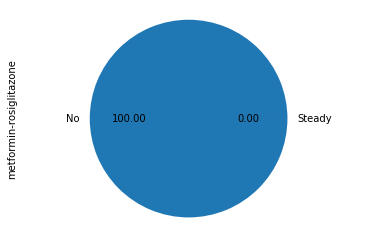

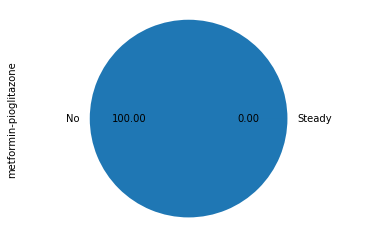

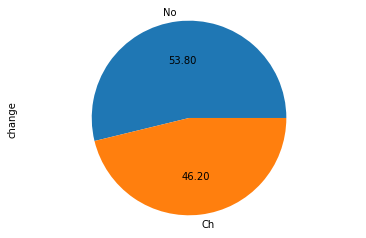

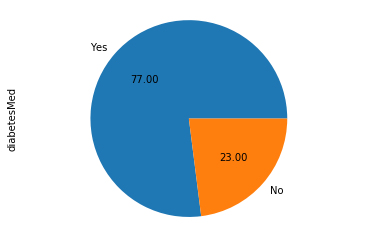

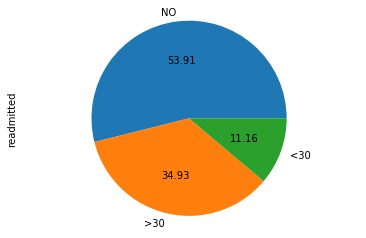

In [12]:
## PIECHART FOR CATEGORICAL DATA EXPLORATION
i = 0 

for col in diabetes.columns:
    if (diabetes[col].dtype.name  == 'category'):
        plt.figure(col)
        diabetes[col].value_counts().plot(kind='pie',autopct='%.2f')
        plt.axis('equal')
        #plt.pie(diabetes[col].value_counts)
        #plt.xlabel(xlabels[i])
        #plt.ylabel("Frequency count")
        #i = i + 1

(-1.1045078763067993,
 1.1002146615209896,
 -1.1054733527232978,
 1.1050123111276369)

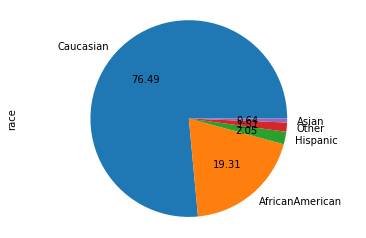

In [13]:
# CODE TO EXPERIMENT WITH PIECHARTS
diabetes['race'].value_counts().plot(kind='pie',autopct='%.2f')
plt.axis('equal')
#plt.pie(.value_counts)

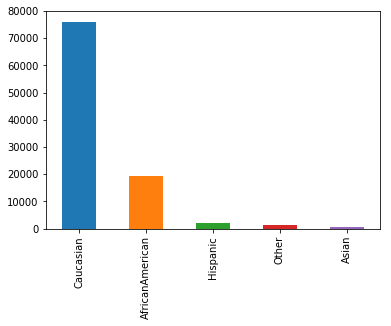

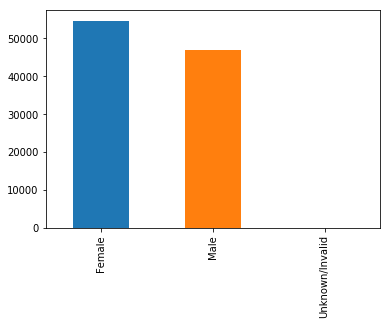

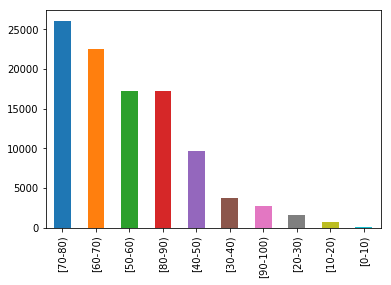

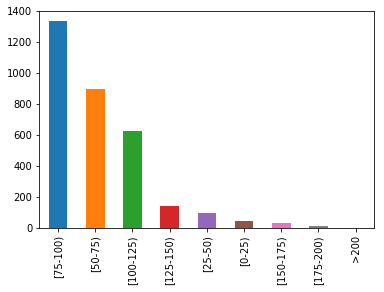

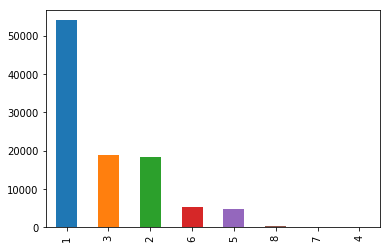

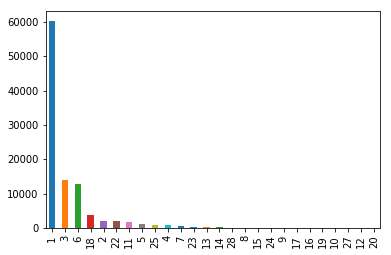

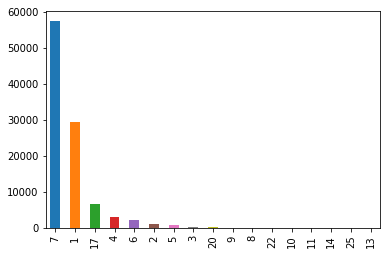

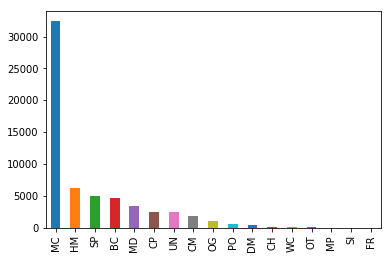

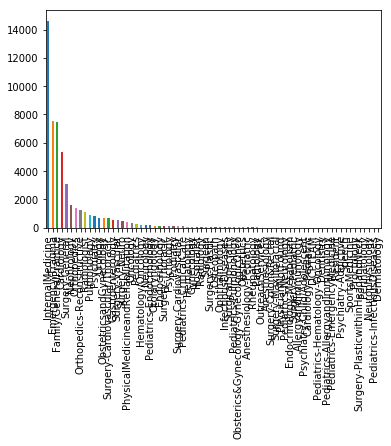

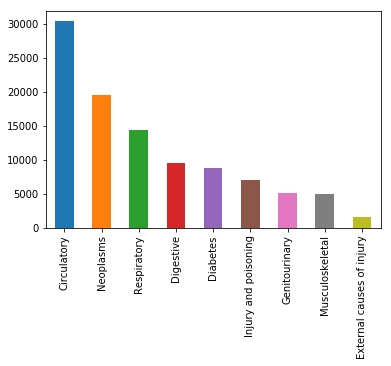

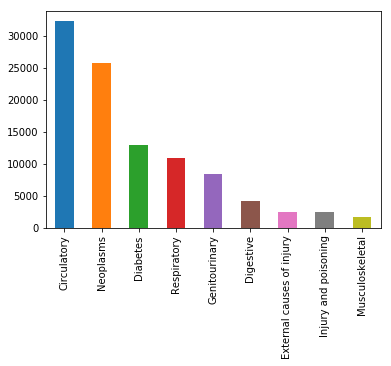

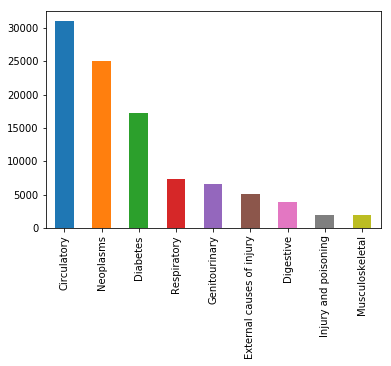

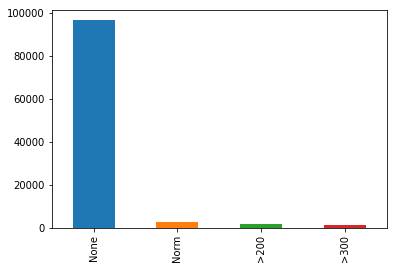

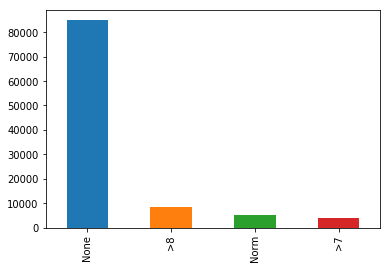

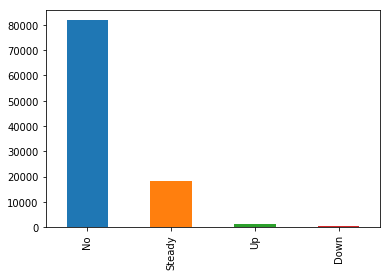

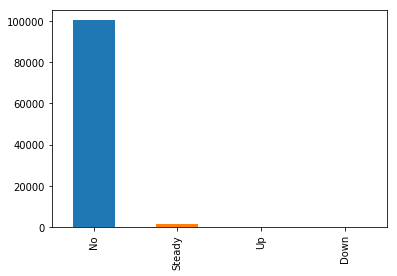

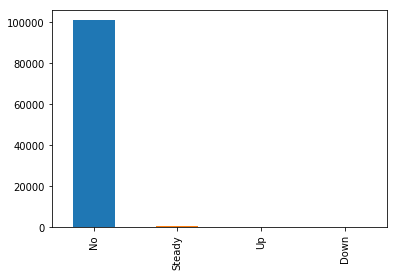

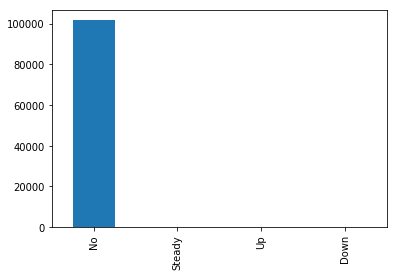

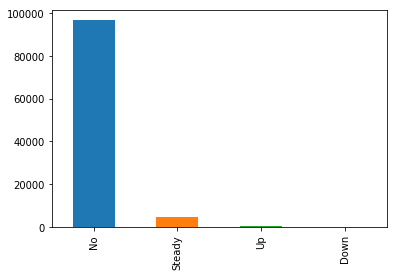

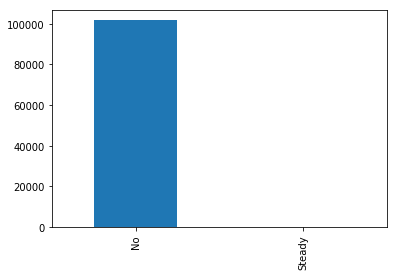

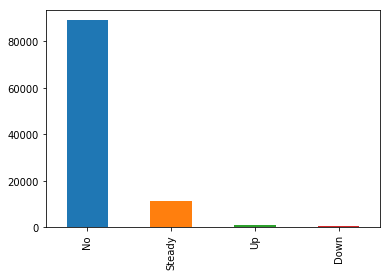

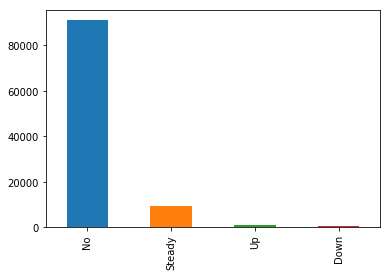

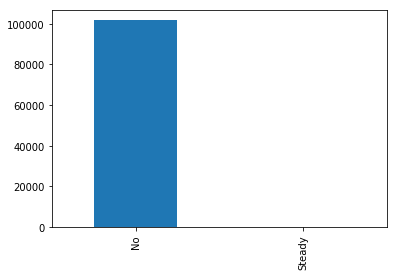

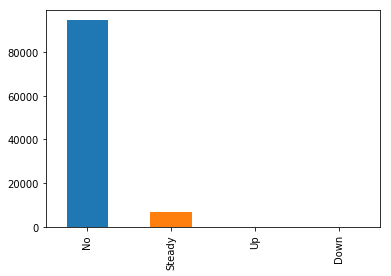

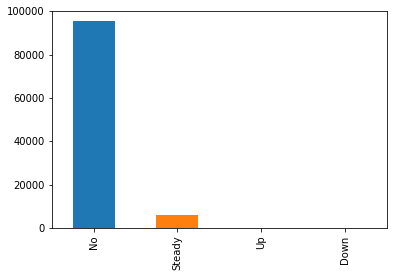

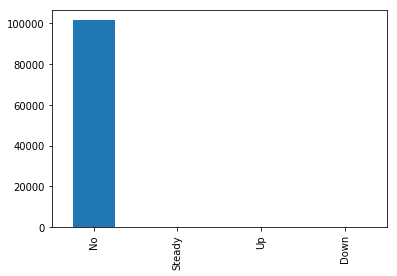

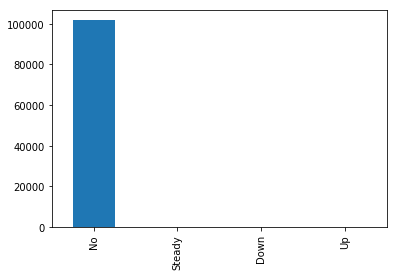

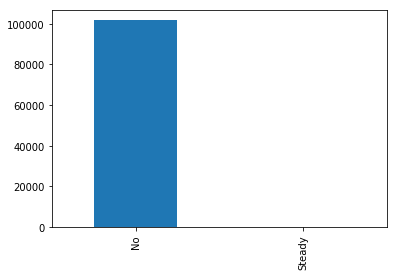

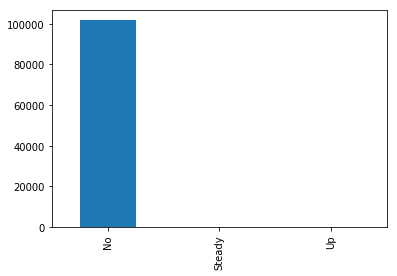

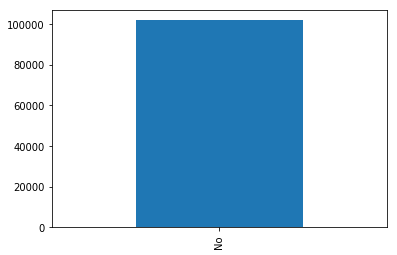

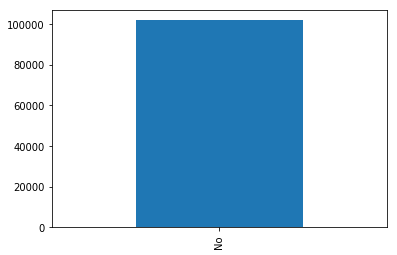

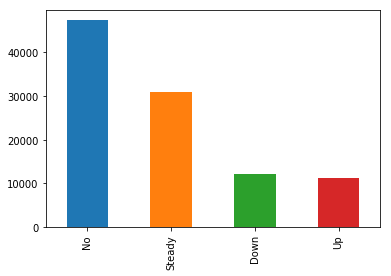

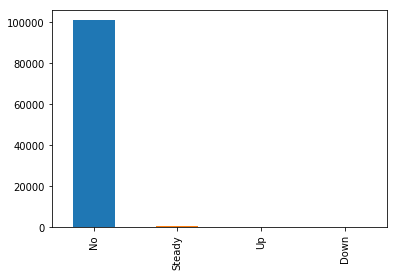

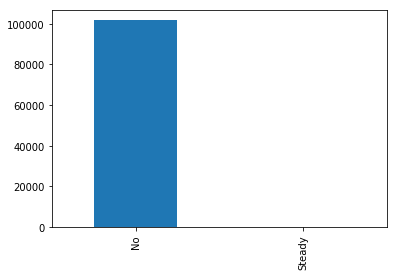

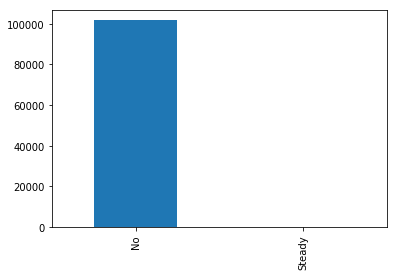

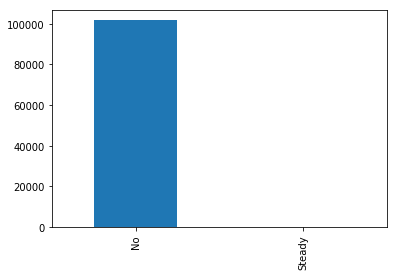

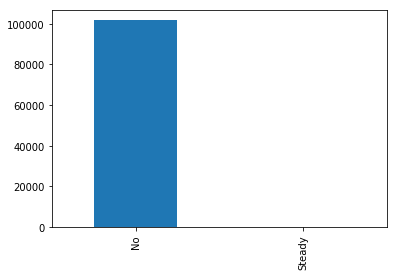

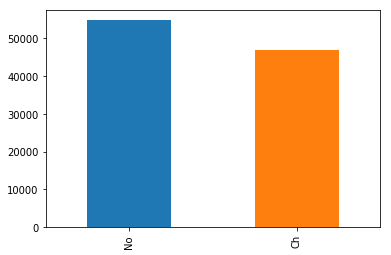

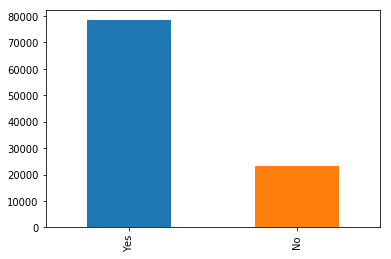

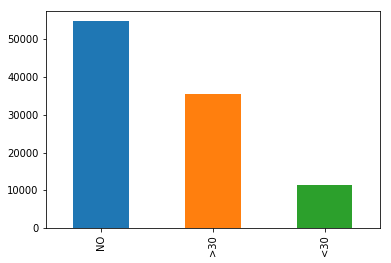

In [14]:
## BAR-GRAPH DISTRIBUTION FOR CATEGORICAL DATA EXPLORATION
i = 0 

for col in diabetes.columns:
    if (diabetes[col].dtype.name  == 'category'):
        plt.figure(col)
        diabetes[col].value_counts().plot(kind='bar')
        #plt.axis('equal')
        #plt.pie(diabetes[col].value_counts)
        #plt.xlabel(xlabels[i])
        #plt.ylabel("Frequency count")
        #i = i + 1

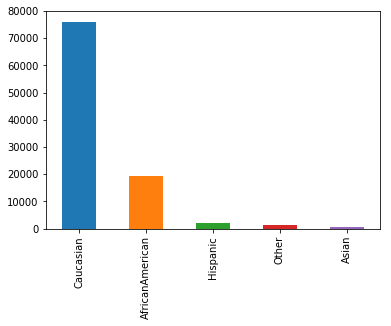

In [15]:
diabetes['race'].value_counts().plot(kind='bar')
#plt.axis('equal')

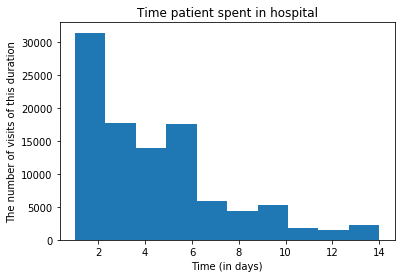

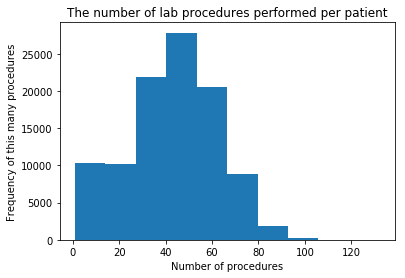

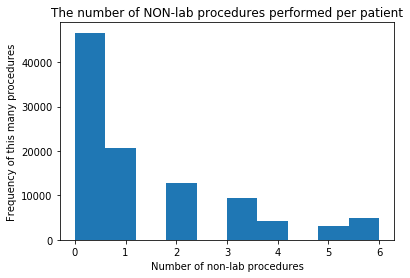

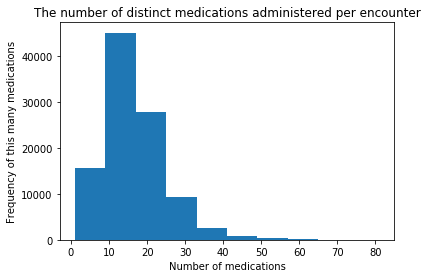

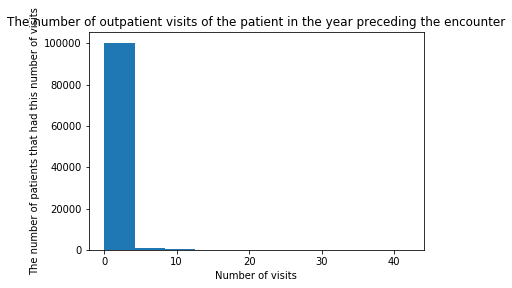

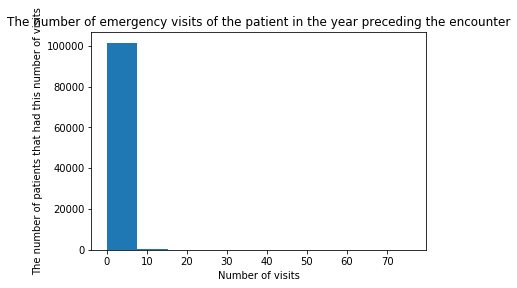

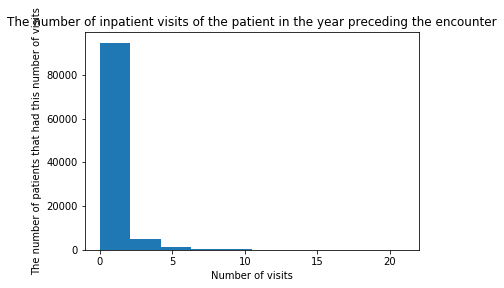

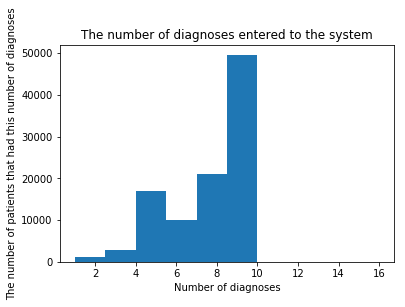

In [16]:
## HISTOGRAM DISTRIBUTION FOR NUMERICAL DATA EXPLORATION

i = 0
title = ("Time patient spent in hospital", "The number of lab procedures performed per patient", "The number of NON-lab procedures performed per patient", "The number of distinct medications administered per encounter", "The number of outpatient visits of the patient in the year preceding the encounter", "The number of emergency visits of the patient in the year preceding the encounter", "The number of inpatient visits of the patient in the year preceding the encounter", "The number of diagnoses entered to the system")
xaxis= ("Time (in days)", "Number of procedures", "Number of non-lab procedures", "Number of medications", "Number of visits", "Number of visits", "Number of visits", "Number of diagnoses")
yaxis= ("The number of visits of this duration", "Frequency of this many procedures", "Frequency of this many procedures", "Frequency of this many medications", "The number of patients that had this number of visits", "The number of patients that had this number of visits", "The number of patients that had this number of visits", "The number of patients that had this number of diagnoses")

for col in diabetes.columns:
    if (diabetes[col].dtype.name == 'int64') & (diabetes[col].name != 'patient_nbr'):
        plt.figure(col)
        diabetes[col].plot(kind='hist')
        plt.title(title[i])
        plt.xlabel(xaxis[i])
        plt.ylabel(yaxis[i])
        i = i + 1

In [17]:
diabetes['race'].plot(kind='hist')

TypeError: Empty 'DataFrame': no numeric data to plot

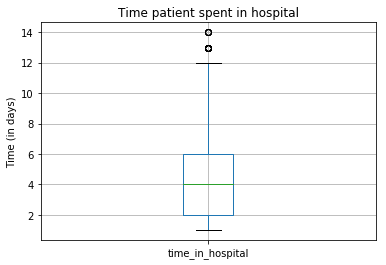

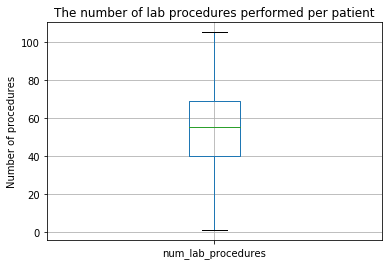

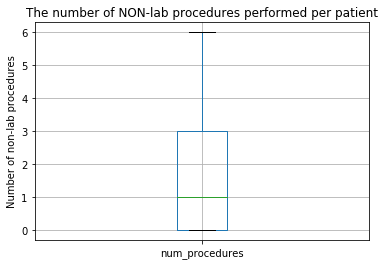

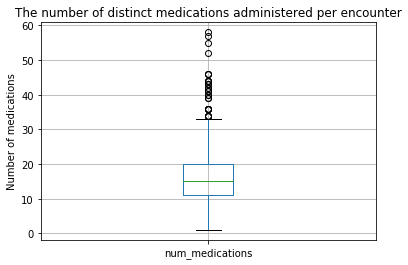

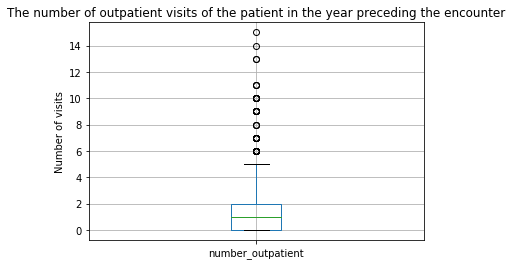

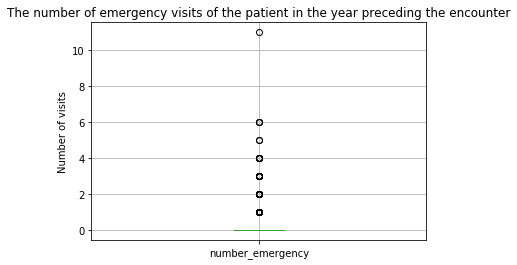

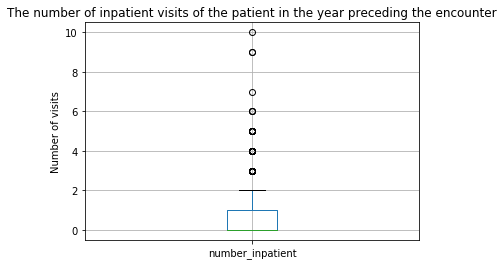

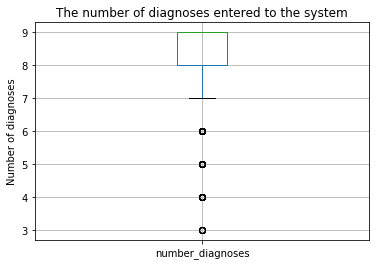

In [3]:
## BOXPLOT FOR NUMERICAL DATA EXPLORATION

i = 0
title = ("Time patient spent in hospital", "The number of lab procedures performed per patient", "The number of NON-lab procedures performed per patient", "The number of distinct medications administered per encounter", "The number of outpatient visits of the patient in the year preceding the encounter", "The number of emergency visits of the patient in the year preceding the encounter", "The number of inpatient visits of the patient in the year preceding the encounter", "The number of diagnoses entered to the system")
yaxis= ("Time (in days)", "Number of procedures", "Number of non-lab procedures", "Number of medications", "Number of visits", "Number of visits", "Number of visits", "Number of diagnoses")
#xaxis= ("The number of visits of this duration", "Frequency of this many procedures", "Frequency of this many procedures", "Frequency of this many medications", "The number of patients that had this number of visits", "The number of patients that had this number of visits", "The number of patients that had this number of visits", "The number of patients that had this number of diagnoses")

for col in diabetes.columns:
    if (diabetes[col].dtype.name == 'int64') & (diabetes[col].name != 'patient_nbr'):
        #print diabetes[col].name + '\n'
        plt.figure(col)
        diabetes.dropna().boxplot(column=col)
        plt.title(title[i])
        plt.ylabel(yaxis[i])
        i = i + 1       
        #plt.xlabel(xaxis[i])


In [ ]:
## PRE-WEIGHT EXPLORATION...TRANSFORM TO 

In [ ]:
#diabetes_copy = diabetes.copy()

In [ ]:
#diabetes_copy['weight'].value_counts()

In [ ]:
#mask_weight = diabetes_copy['weight'] == "[75-100)"

In [ ]:
#diabetes_copy.loc[mask_weight,'weight'] = 87.5

In [ ]:
#mask_weight_50 = diabetes_copy['weight'] == "[50-75)"
#diabetes_copy.loc[mask_weight_50,'weight'] = (50+75)/2

In [ ]:
#mask_weight_100 = diabetes_copy['weight'] == "[100-125)"
#diabetes_copy.loc[mask_weight_100,'weight'] = (100+125)/2

In [ ]:
#mask_weight_125 = diabetes_copy['weight'] == "[125-150)"
#diabetes_copy.loc[mask_weight_125,'weight'] = (125+150)/2

In [ ]:
#mask_weight_25 = diabetes_copy['weight'] == "[25-50)"
#diabetes_copy.loc[mask_weight_25,'weight'] = (25+50)/2

In [ ]:
#mask_weight_0 = diabetes_copy['weight'] == "[0-25)"
#diabetes_copy.loc[mask_weight_0,'weight'] = (0+25)/2

In [ ]:
#mask_weight_150 = diabetes_copy['weight'] == "[150-175)"
#diabetes_copy.loc[mask_weight_150,'weight'] = (150+175)/2

In [ ]:
#mask_weight_175 = diabetes_copy['weight'] == "[175-200)"
#diabetes_copy.loc[mask_weight_175,'weight'] = (175+200)/2

In [ ]:
#mask_weight_200 = diabetes_copy['weight'] == ">200"
#diabetes_copy.loc[mask_weight_200,'weight'] = 200

In [ ]:
# Relationship: Race vs weight

In [ ]:
# converting weight to numeric then calculating mean by race
#diabetes_copy["weight"] = pd.to_numeric(diabetes_copy["weight"])
#race_weight = diabetes_copy["weight"].groupby(diabetes_copy['race']).mean()
#race_weight.plot(kind="bar")
#plt.ytitle="y"

In [ ]:
#diabetes_copy["weight"].groupby(diabetes_copy['race']).value_counts()

In [ ]:
#boxplot(diabetes_copy$weight~diabetes_copy$race)

In [ ]:
#mask_Caucasian = diabetes_copy['race']=="Caucasian"
#caucasian_data = diabetes_copy[mask_Caucasian]
#caucasian_weight = caucasian_data["weight"].value_counts()
#caucasian_weight.plot(kind="hist")

In [ ]:
#mask_AfricanAmerican
#mask_Hispanic
#mask_Other
#mask_Asian

## B - EXPLORE RELATIONSHIPS BETWEEN ALL ATTRIBUTES

In [ ]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(diabetes,alpha=0.2,figsize=(20,20),diagonal='hist')
plt.show()

In [ ]:
diabetes.info()

In [ ]:
# ALC_test result vs diagnosis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20de2750>,
      dtype=object)

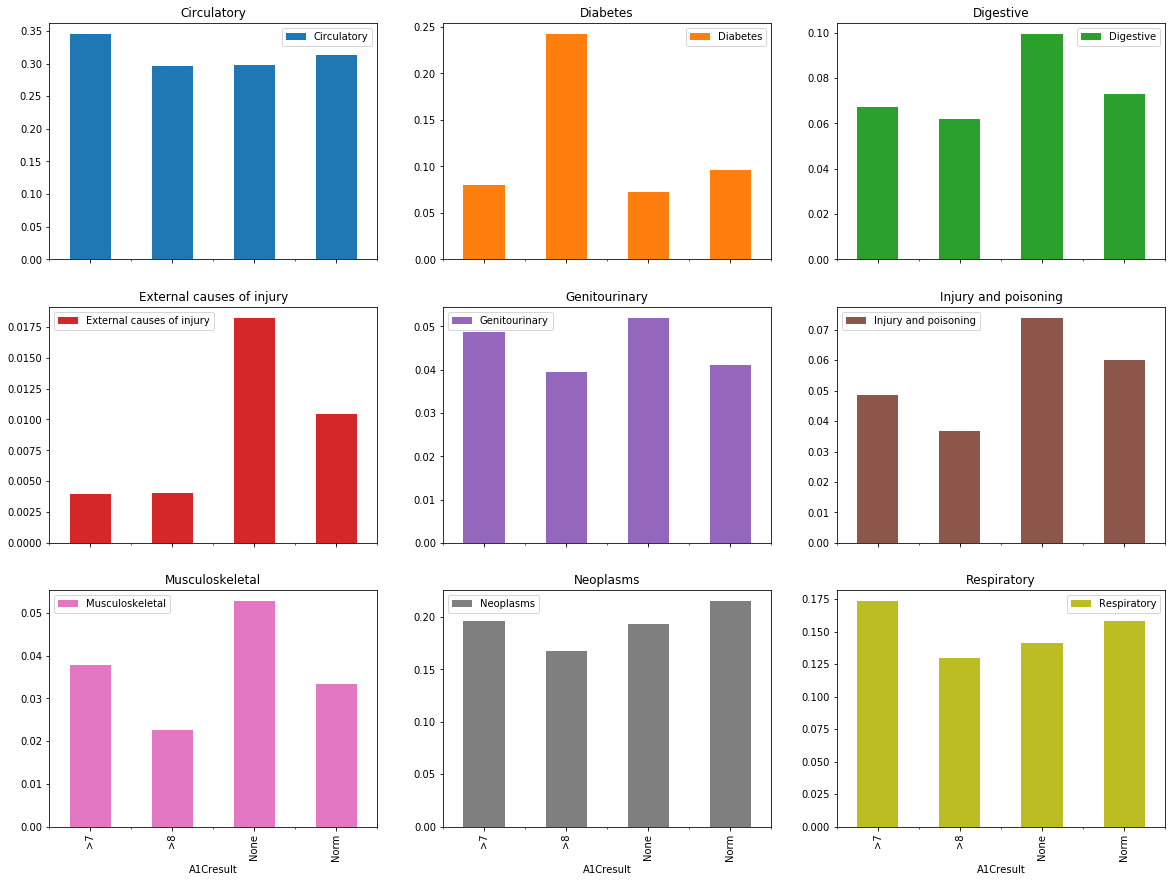

In [36]:
grouped = diabetes.groupby(['A1Cresult']).diag_1.value_counts(normalize=True)
grouped.unstack().plot(kind='bar', subplots=True, layout=(4,3), figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a217a3f90>,
      dtype=object)

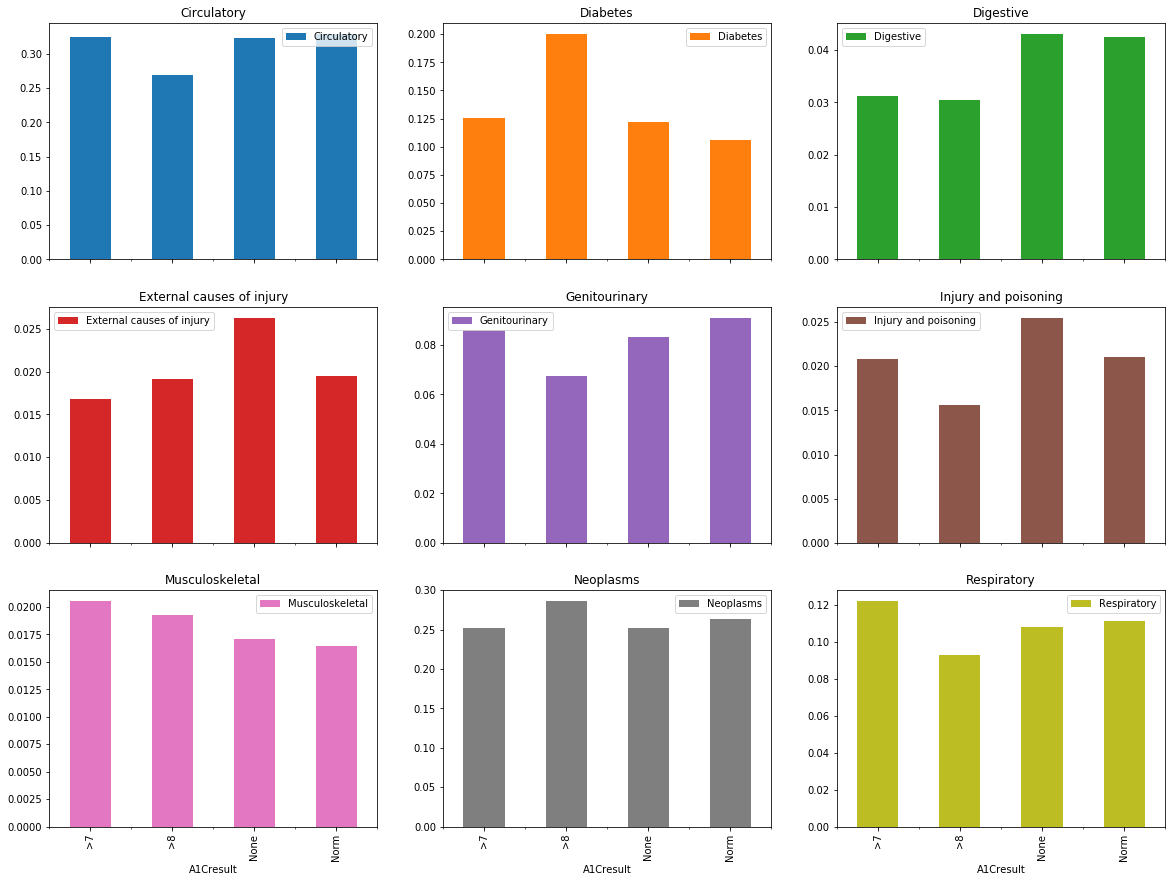

In [39]:
grouped = diabetes.groupby(['A1Cresult']).diag_2.value_counts(normalize=True)
grouped.unstack().plot(kind='bar', subplots=True, layout=(4,3), figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21fed810>,
      dtype=object)

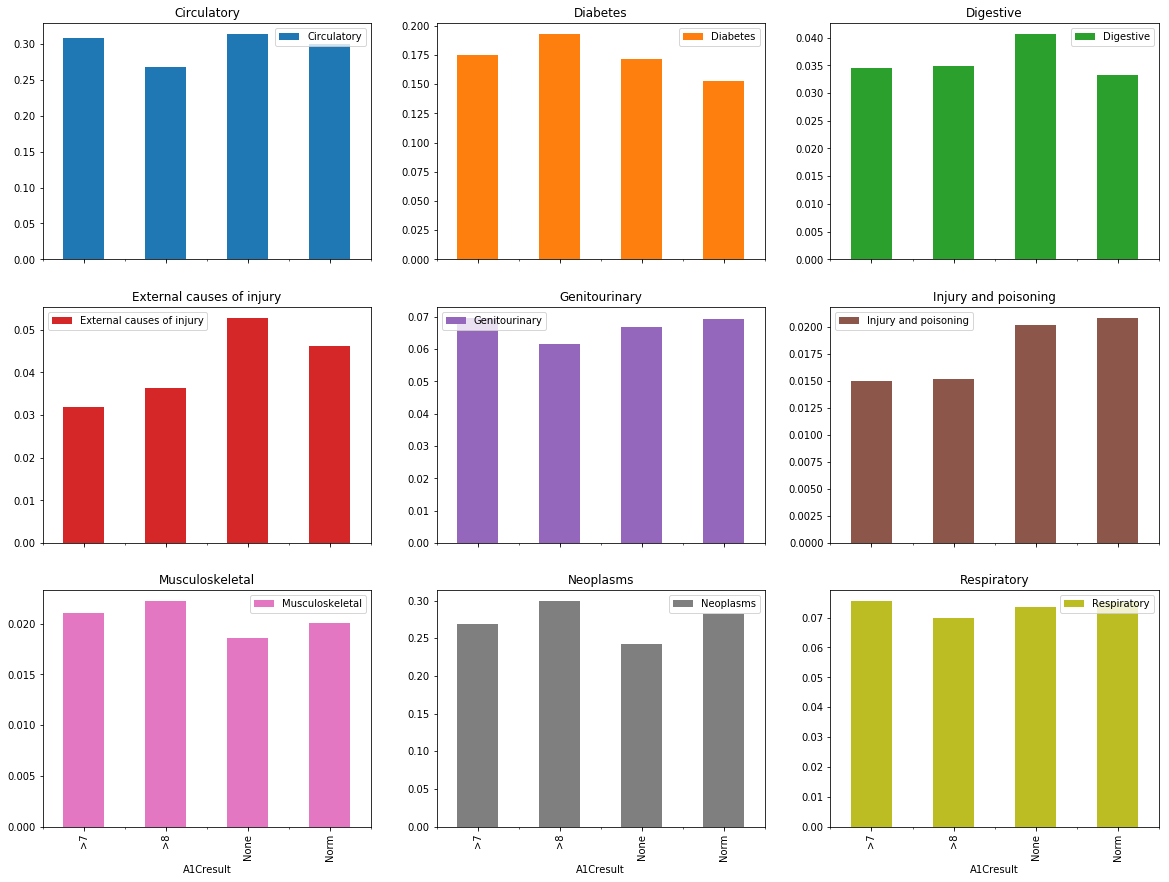

In [40]:
grouped = diabetes.groupby(['A1Cresult']).diag_3.value_counts(normalize=True)
grouped.unstack().plot(kind='bar', subplots=True, layout=(4,3), figsize=(20,20))

In [ ]:
# Race vs weight

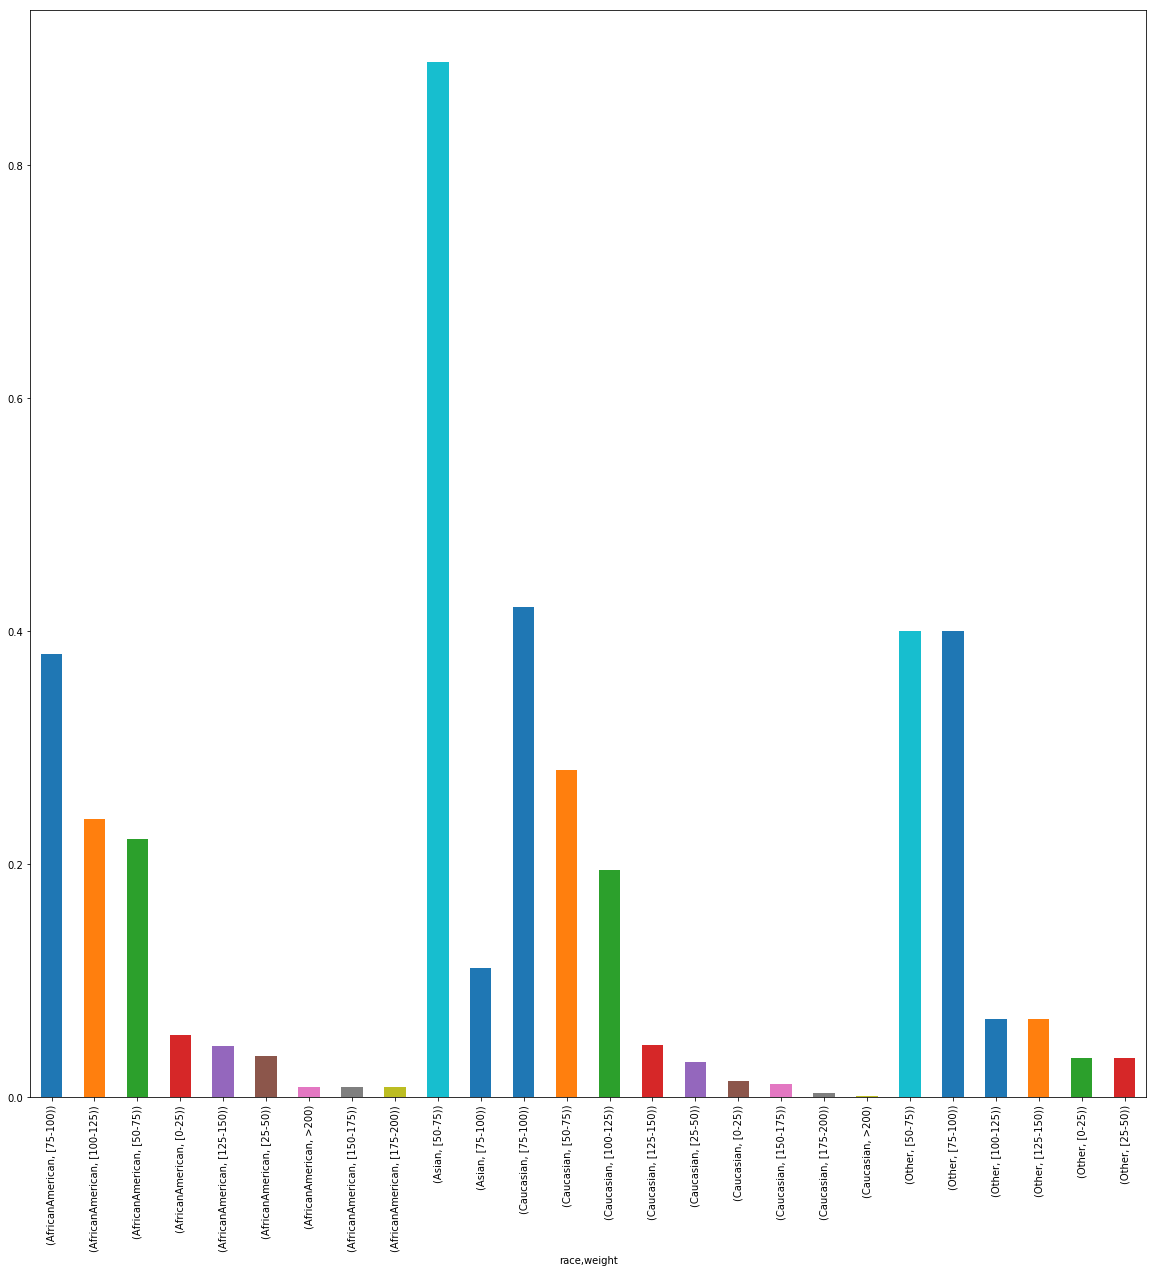

In [58]:
diabetes['weight'].groupby(diabetes['race']).value_counts(normalize=True).plot(kind="bar", figsize=(20,20))

In [47]:
grouped = diabetes.groupby(['race']).weight.value_counts(normalize=True)
print grouped


race             weight   
AfricanAmerican  [75-100)     0.380531
                 [100-125)    0.238938
                 [50-75)      0.221239
                 [0-25)       0.053097
                 [125-150)    0.044248
                 [25-50)      0.035398
                 >200         0.008850
                 [150-175)    0.008850
                 [175-200)    0.008850
Asian            [50-75)      0.888889
                 [75-100)     0.111111
Caucasian        [75-100)     0.420709
                 [50-75)      0.280702
                 [100-125)    0.195046
                 [125-150)    0.044376
                 [25-50)      0.030272
                 [0-25)       0.013760
                 [150-175)    0.011352
                 [175-200)    0.003096
                 >200         0.000688
Other            [50-75)      0.400000
                 [75-100)     0.400000
                 [100-125)    0.066667
                 [125-150)    0.066667
                 [0-25)       0.03333

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23fd8490>,
      dtype=object)

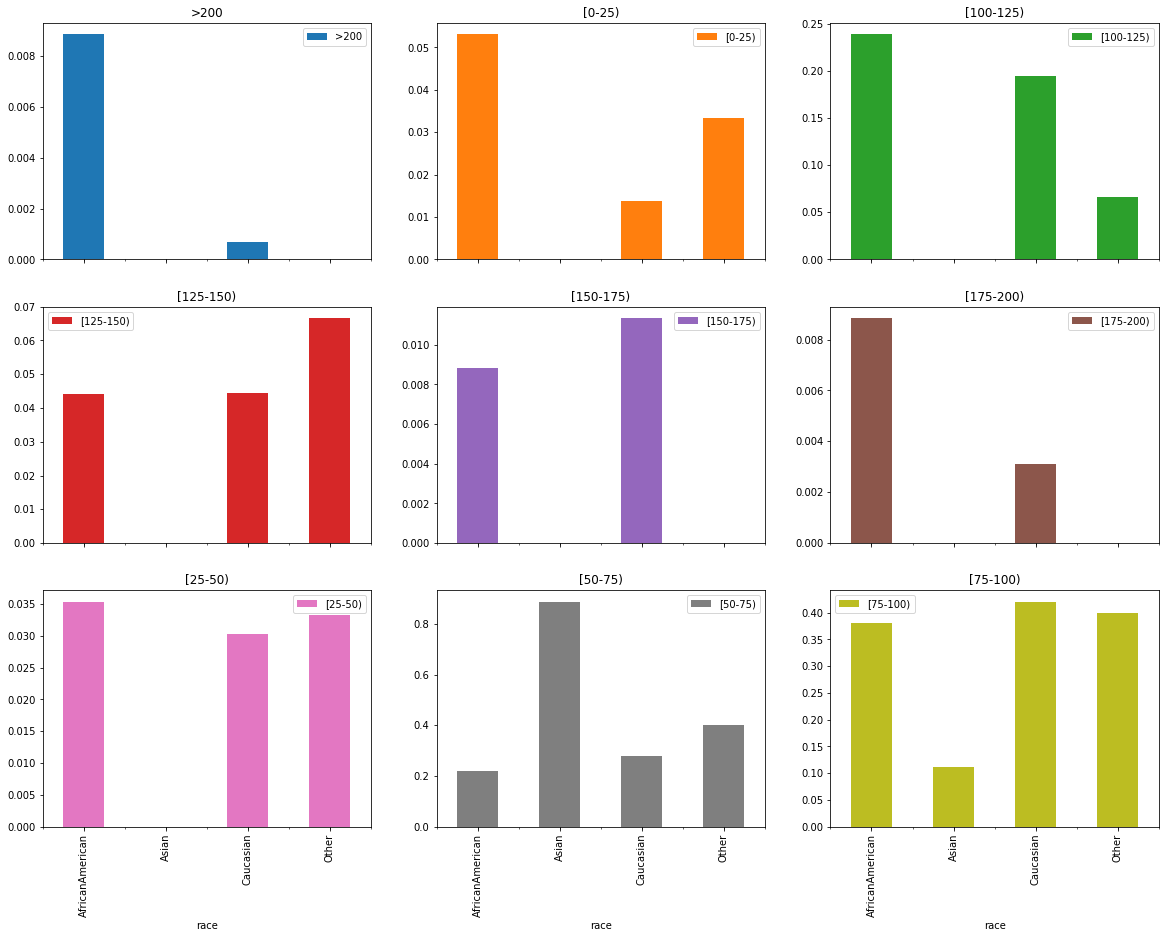

In [48]:
grouped.unstack().plot(kind='bar', subplots=True, layout=(4,3), figsize=(20,20))

In [ ]:
# Relationship: age vs diagnosis

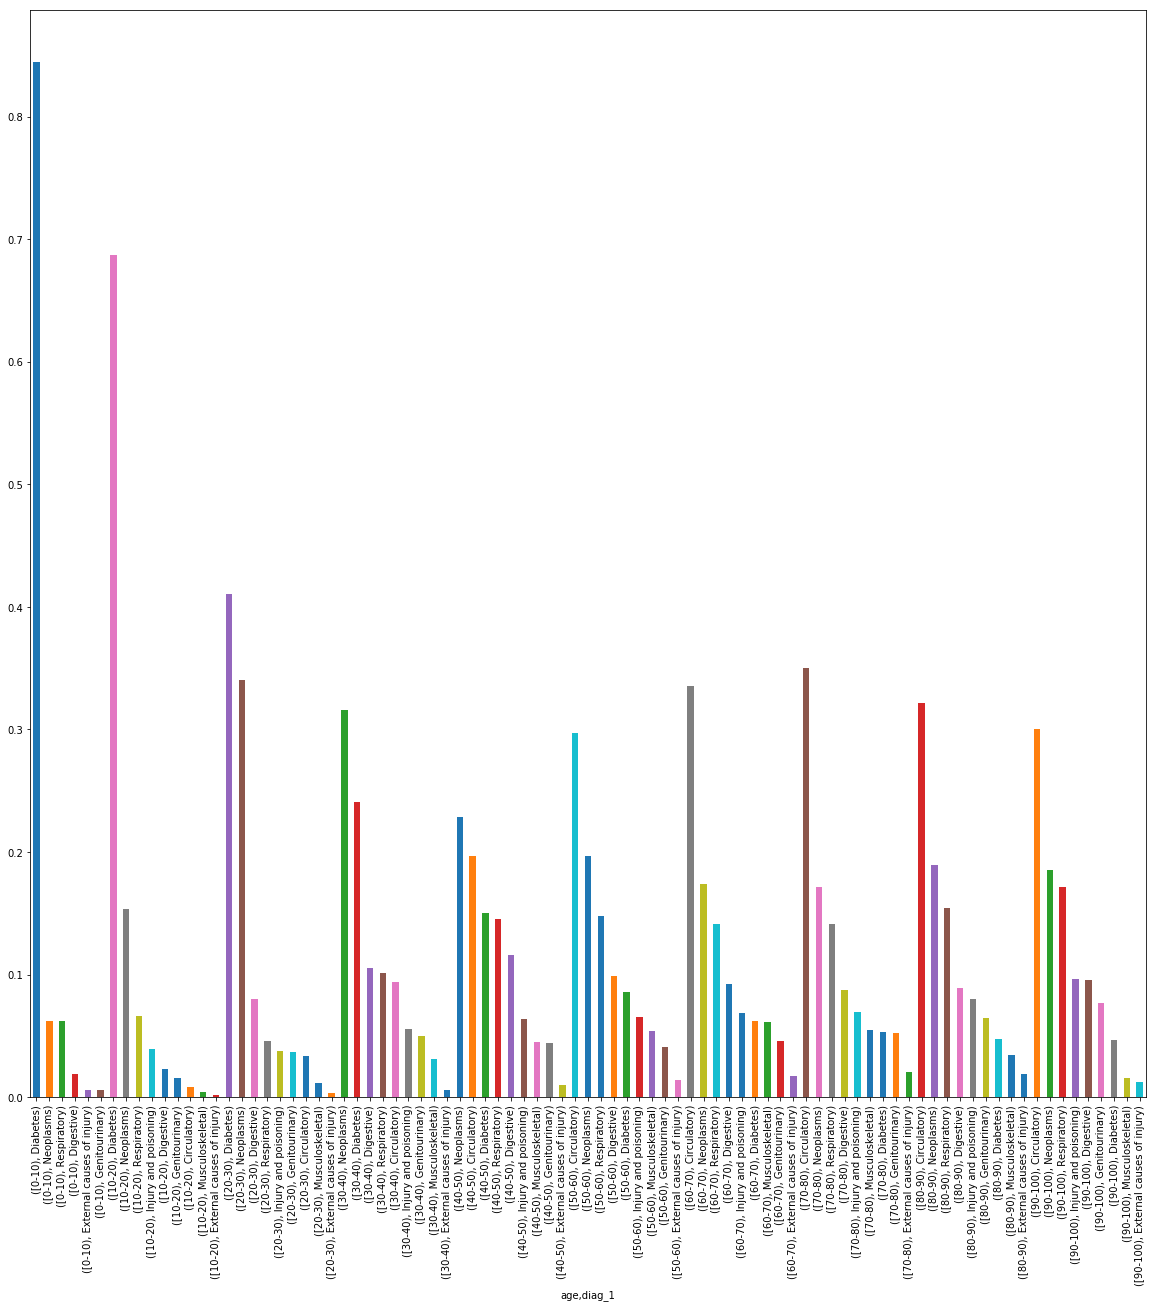

In [54]:
diabetes['diag_1'].groupby(diabetes['age']).value_counts(normalize=True).plot(kind="bar", figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2540dc50>,
      dtype=object)

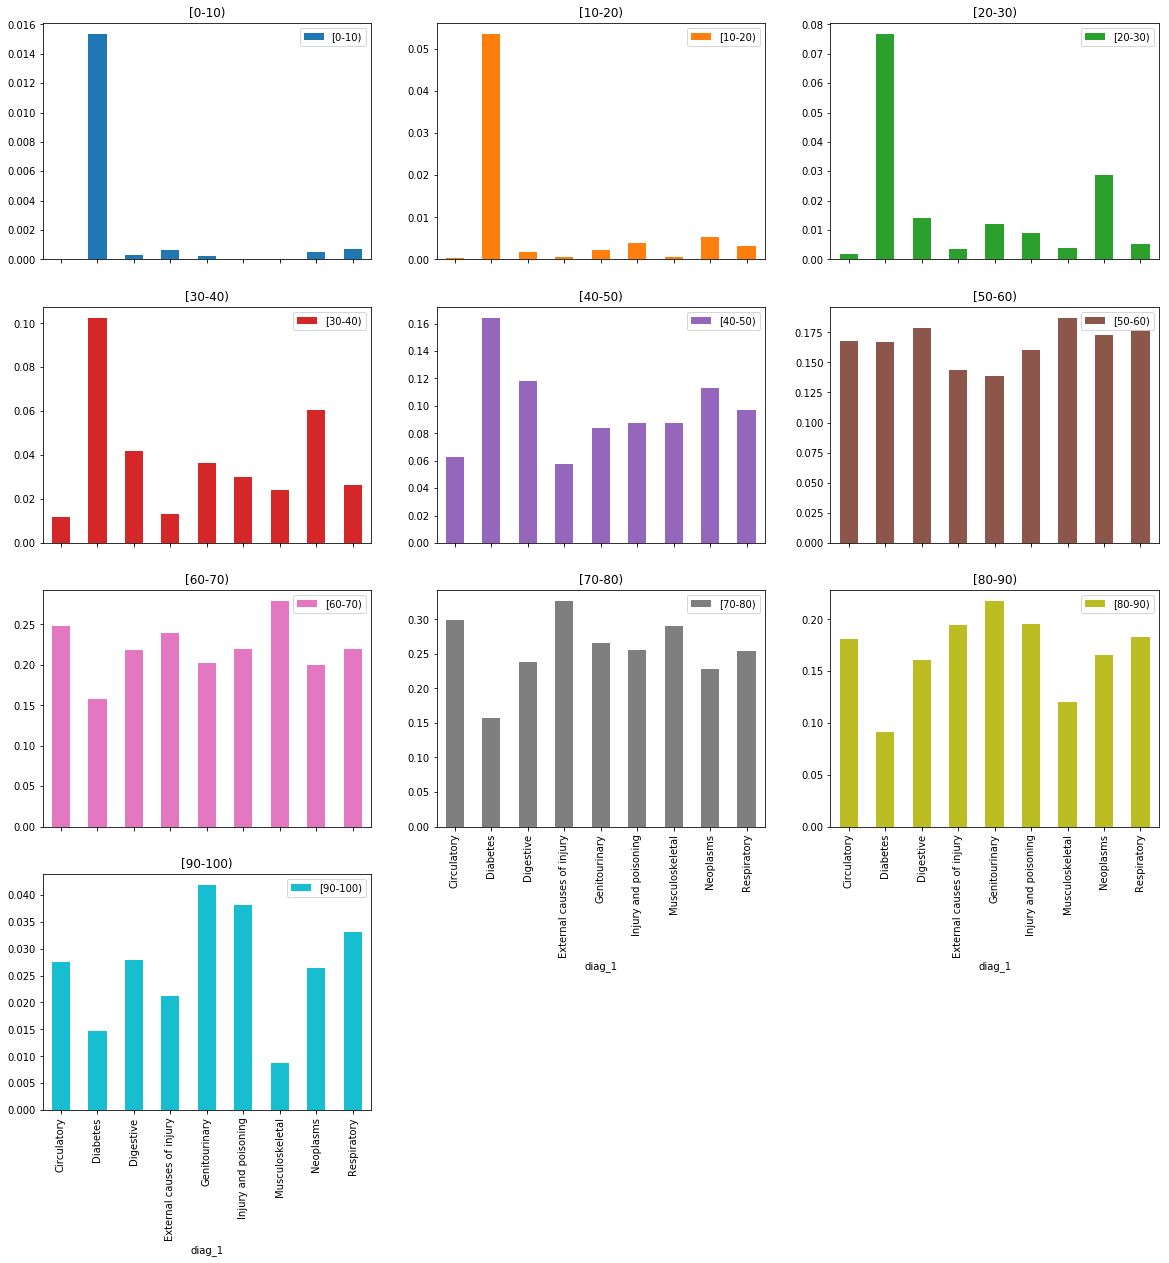

In [49]:
grouped = diabetes.groupby(['diag_1']).age.value_counts(normalize=True)
grouped.unstack().plot(kind='bar', subplots=True, layout=(4,3), figsize=(20,20))

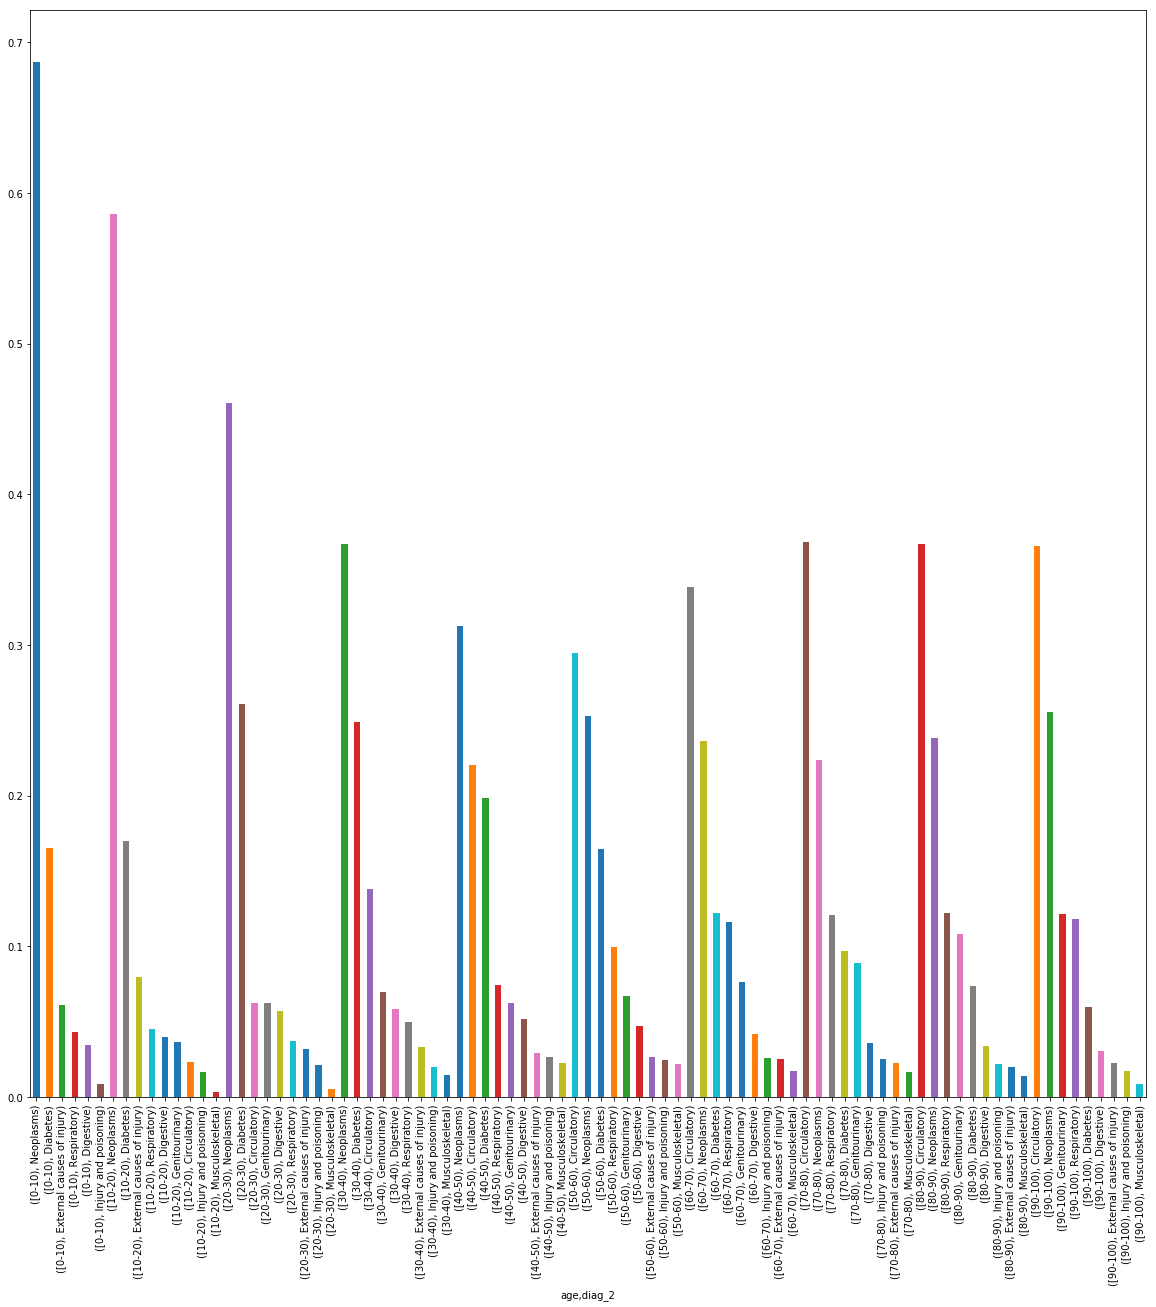

In [55]:
diabetes['diag_2'].groupby(diabetes['age']).value_counts(normalize=True).plot(kind="bar", figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25f7a6d0>,
      dtype=object)

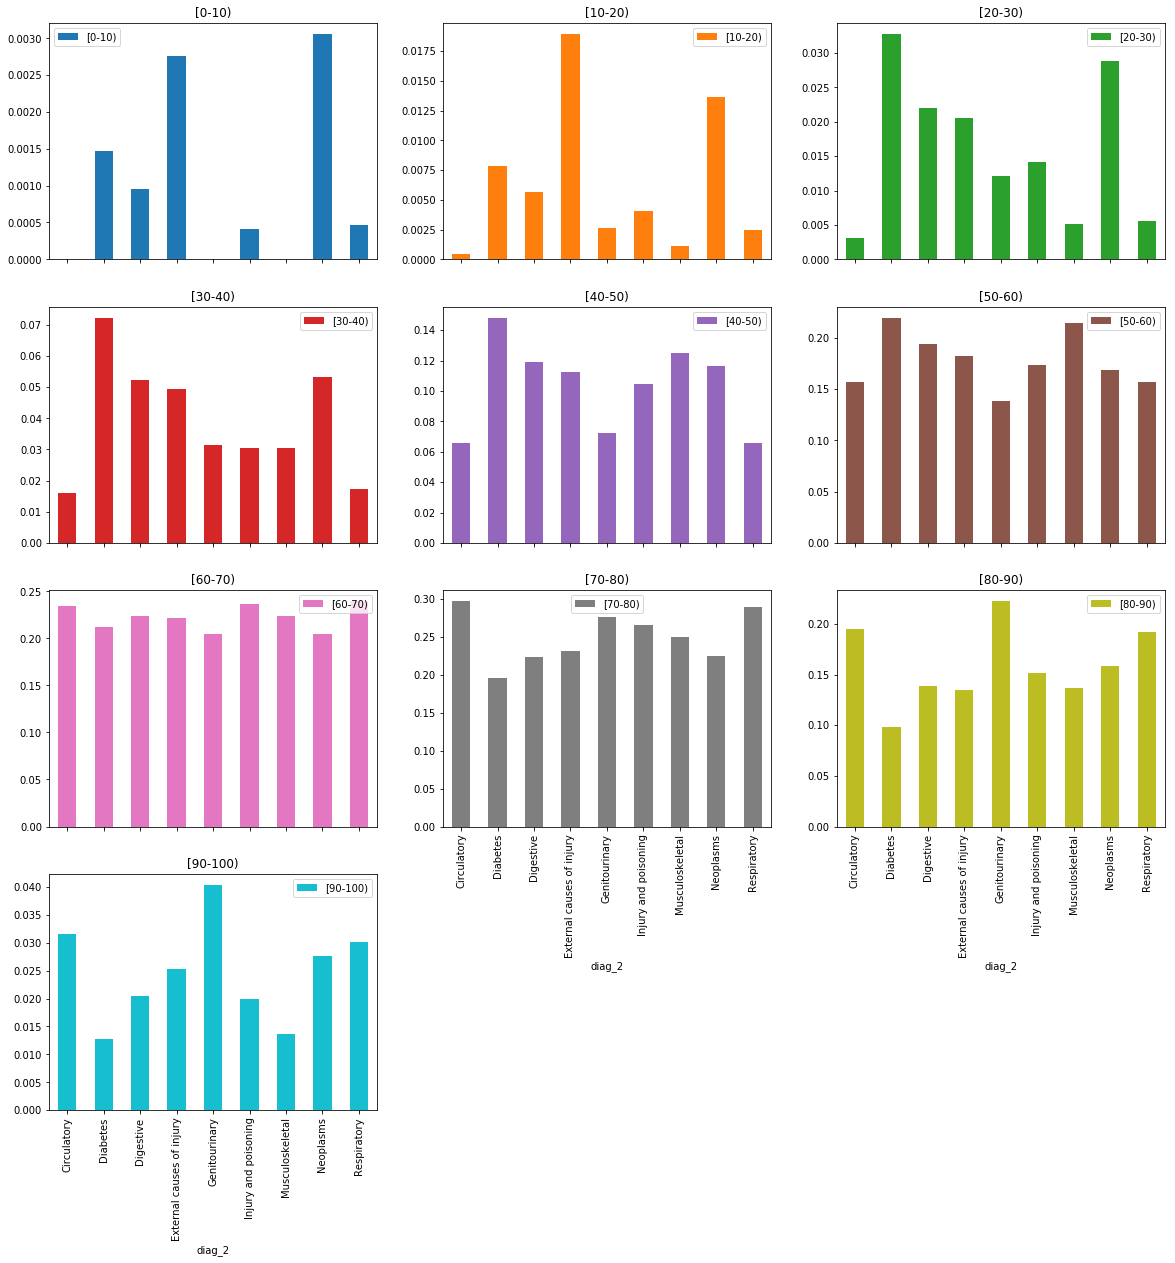

In [50]:
grouped = diabetes.groupby(['diag_2']).age.value_counts(normalize=True)
grouped.unstack().plot(kind='bar', subplots=True, layout=(4,3), figsize=(20,20))

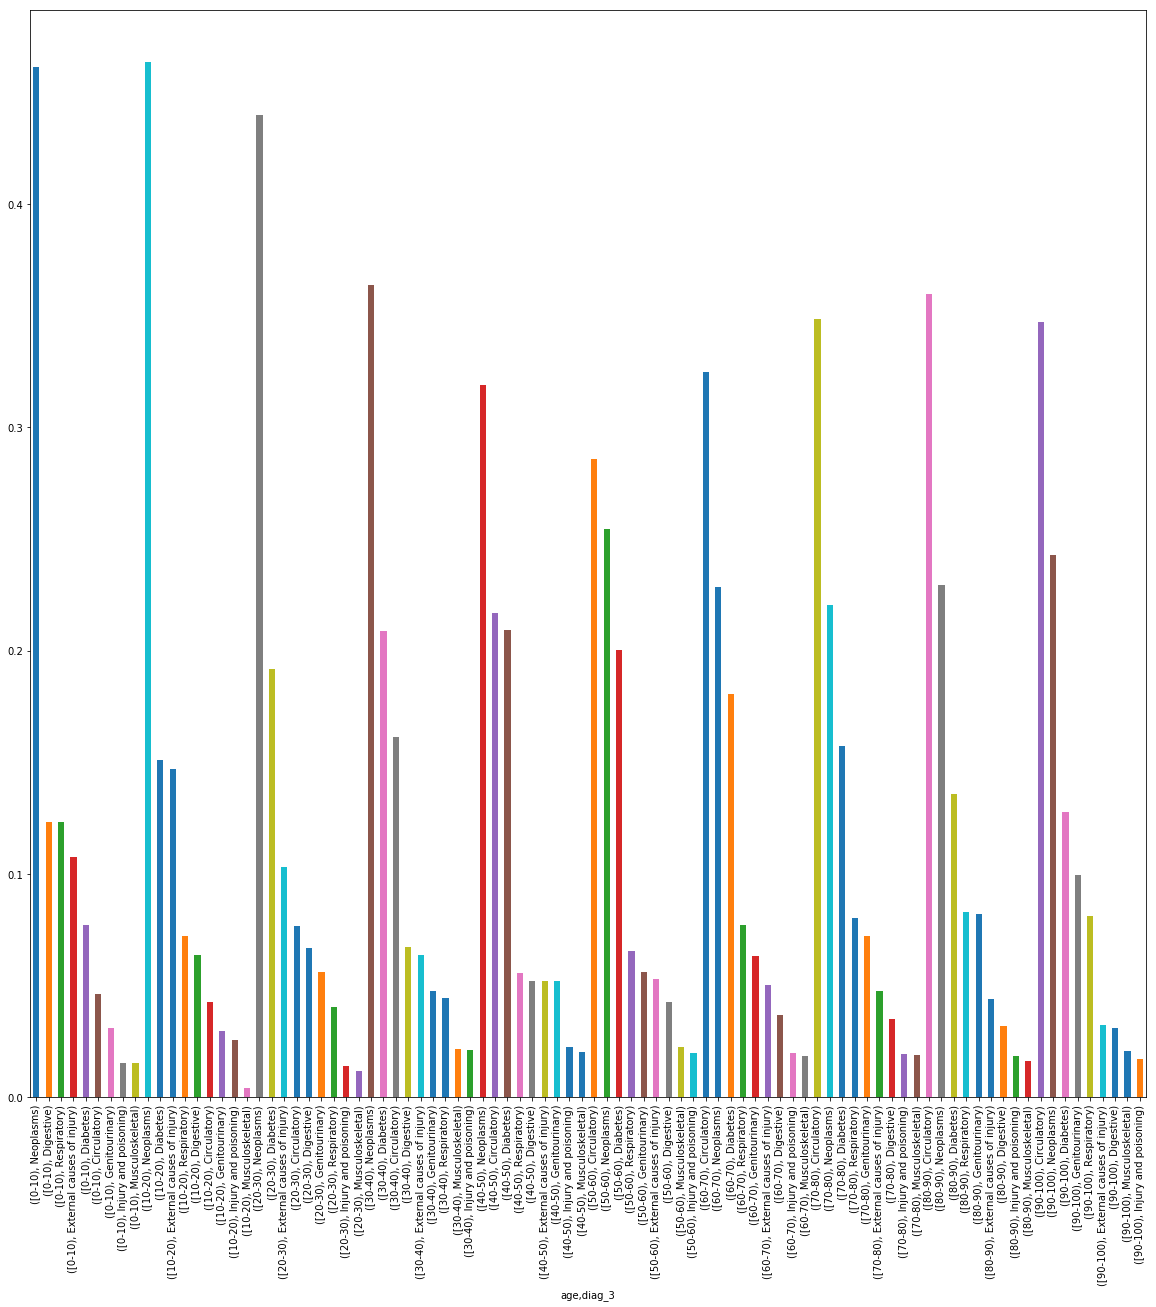

In [56]:
diabetes['diag_3'].groupby(diabetes['age']).value_counts(normalize=True).plot(kind="bar", figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a26ce18d0>,
      dtype=object)

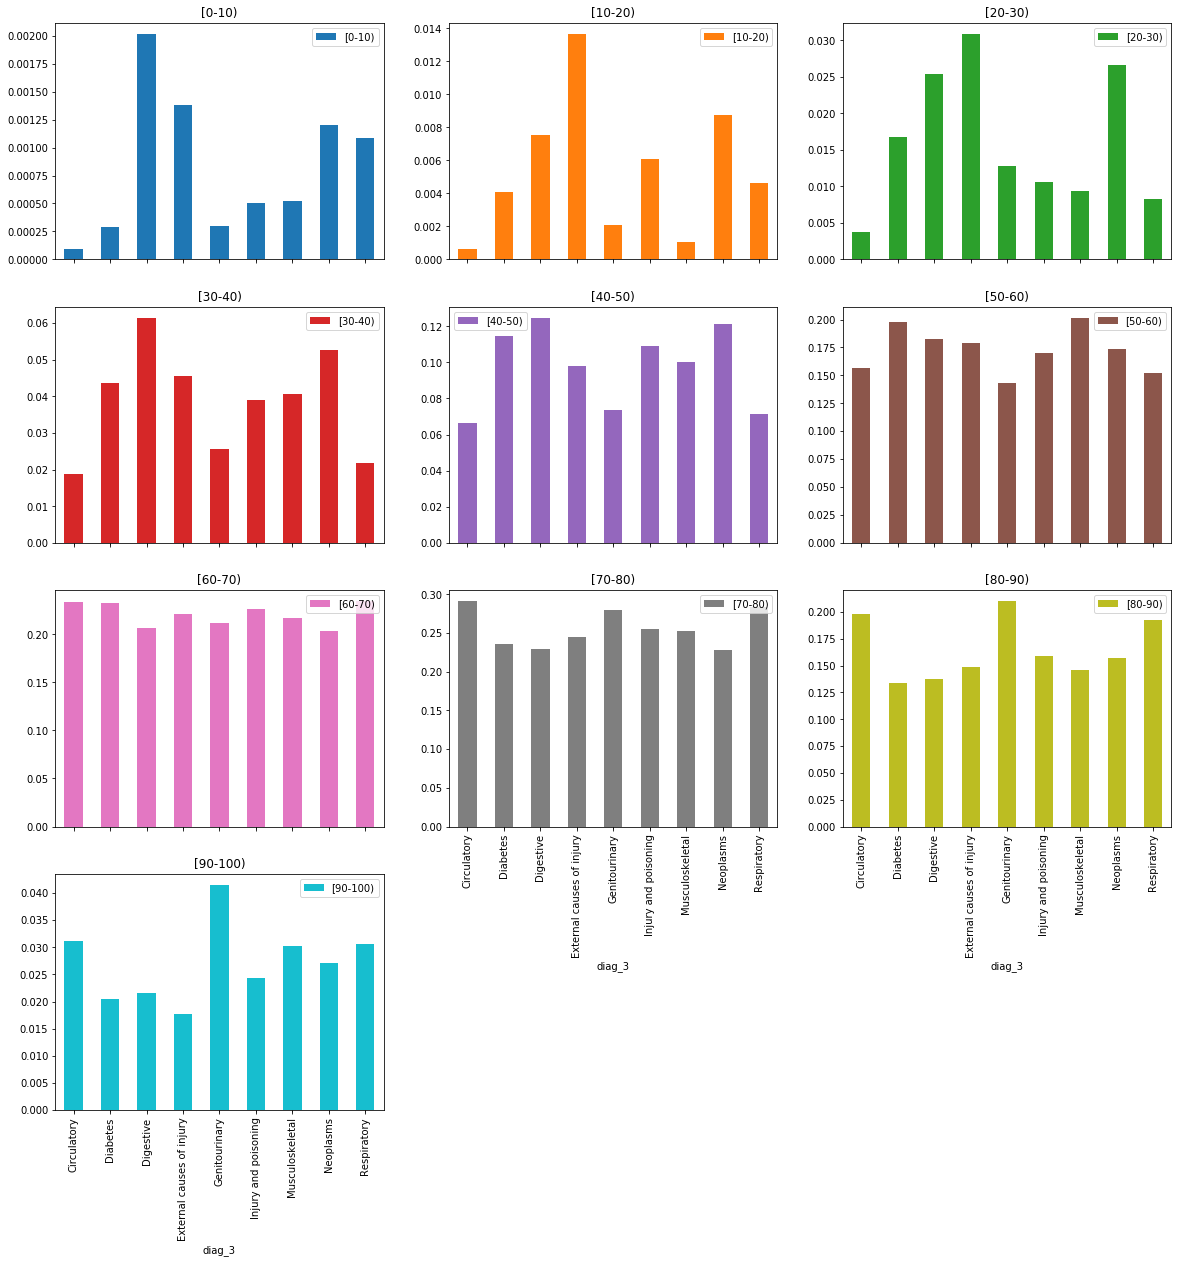

In [51]:
grouped = diabetes.groupby(['diag_3']).age.value_counts(normalize=True)
grouped.unstack().plot(kind='bar', subplots=True, layout=(4,3), figsize=(20,20))

In [59]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 49 columns):
patient_nbr                 101766 non-null int64
race                        99493 non-null category
gender                      101766 non-null category
age                         101766 non-null category
weight                      3197 non-null category
admission_type_id           101766 non-null category
discharge_disposition_id    101766 non-null category
admission_source_id         101766 non-null category
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null category
medical_specialty           51817 non-null category
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
diag_1           

In [ ]:
# Relationship: Glucose syrum vs diagnosis

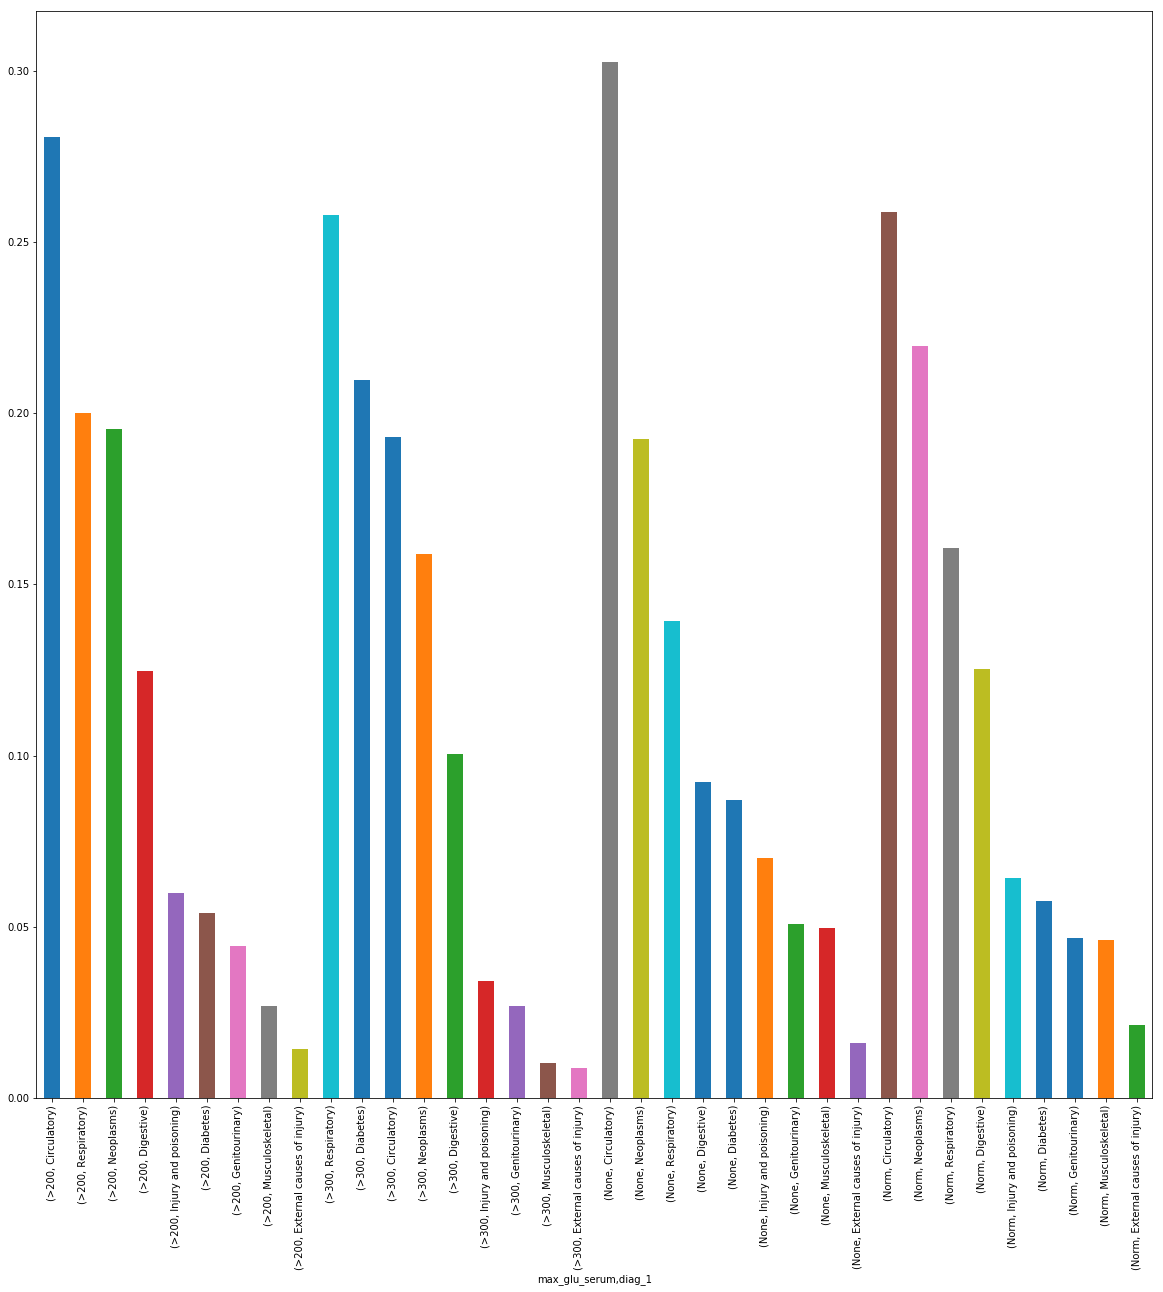

In [61]:
diabetes['diag_1'].groupby(diabetes['max_glu_serum']).value_counts(normalize=True).plot(kind="bar", figsize=(20,20))

In [ ]:
# Relationship: Readmitted numbers vs treated for diabetes

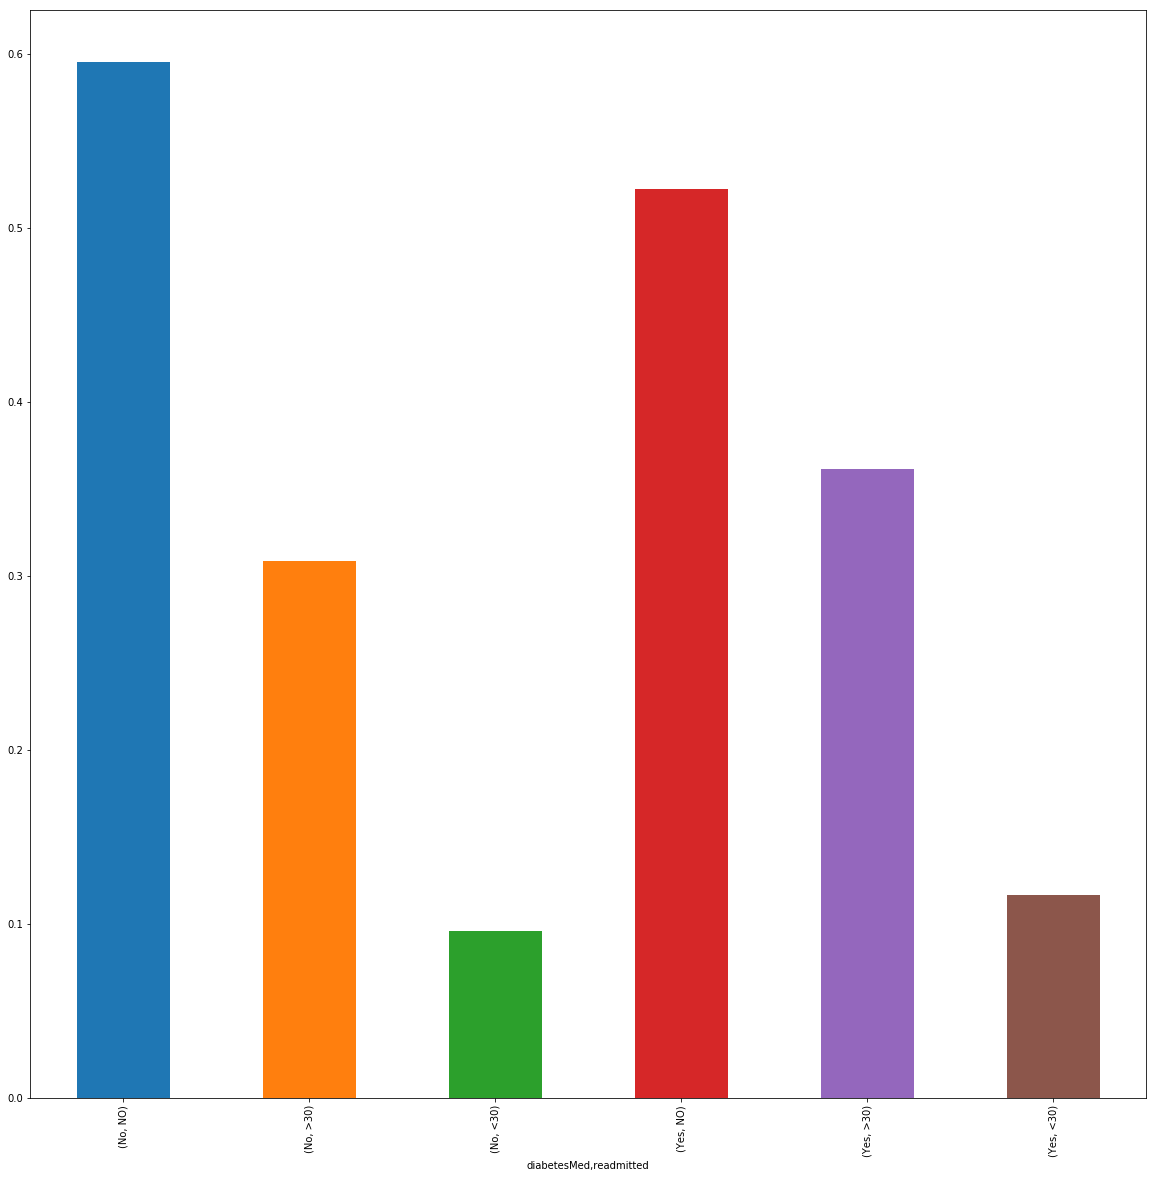

In [62]:
diabetes['readmitted'].groupby(diabetes['diabetesMed']).value_counts(normalize=True).plot(kind="bar", figsize=(20,20))